# SUPERVISED MACHINE LEARNING ALGORITHMS

In [1]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

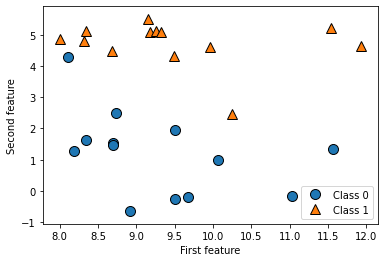

X.shape: (26, 2)


In [2]:
#sample dataset for classification - synthetic dataset
#generate dataset 
X, y = mglearn.datasets.make_forge()
#plot data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc = 4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()
print('X.shape:', X.shape)

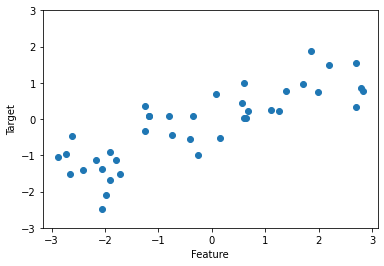

In [3]:
#Sample dataset for regression - synthetic dataset
X,y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [4]:
#Breast Cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print('Shape of cancer data:', cancer['data'].shape)
print('{} rows and {} columns'.format(cancer['data'].shape[0], cancer['data'].shape[1]))

Shape of cancer data: (569, 30)
569 rows and 30 columns


In [6]:
#Sample per class
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [7]:
print('Feature names:\n', cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
print('Data shape:', boston.data.shape)

Data shape: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)

X.shape: (506, 104)


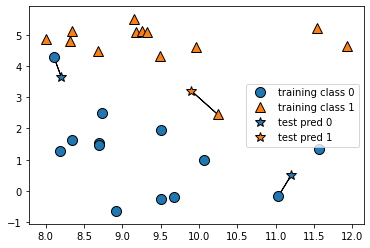

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

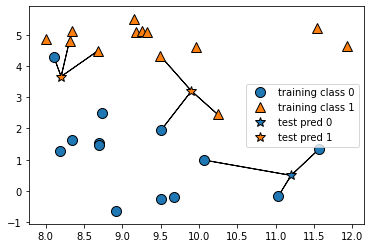

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train, y_train)
print('Test set predictions:', clf.predict(X_test))

print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


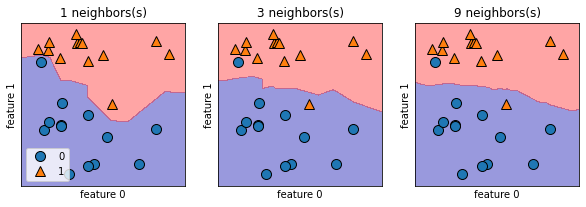

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title('{} neighbors(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc = 3)
    

Decision boundaries created by the nearest neighbors model for different values of n_neighbors

In [15]:
from sklearn.datasets import load_breast_cancer

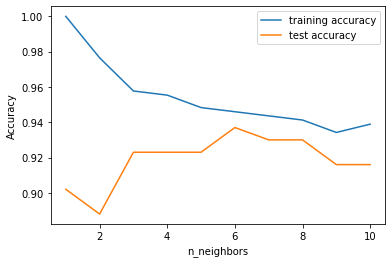

In [16]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, 
                                                    random_state = 66)

training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

K-Neighbors Regression

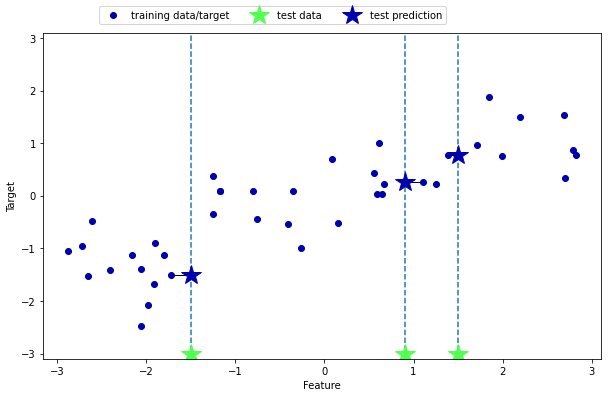

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

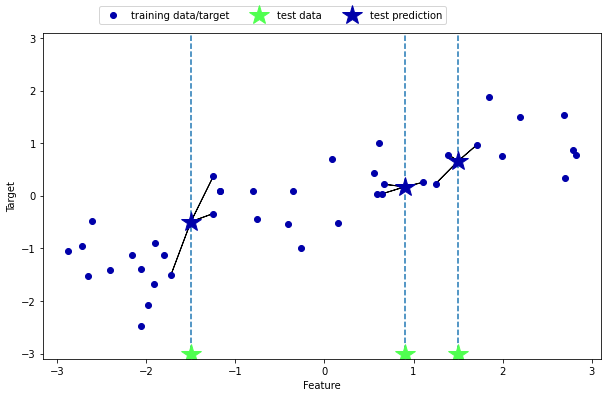

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)